<a href="https://colab.research.google.com/github/jaitrasaketh/IIIT-Hyderabad-AI-ML-Program/blob/main/AIML_Course_Probability_Primer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Contents of Practice Lab 2 - IIIT Hyderabad



> 31st May,2024.



  Introduction to Probability
*   Definition

*   Regression to Mean

*   Expectation


> Solution to Problems given in the Assignment



*   Measures of Error

*   Conditional Probability, Total Probability and Baye's Theorem

*   Random Variables (Continuous and Discrete)

*   Probability Distributions














In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import plotly.graph_objects as pg
import plotly.express as px

In [ ]:
def rcb_win_ipl(no_of_seasons):
    return pd.Series(np.random.choice(['Ee sala cup namde','Ee sala cup nahi'],no_of_seasons))

In [ ]:
results= rcb_win_ipl(17)
print(results)

print()

print (results.value_counts())

0     Ee sala cup namde
1     Ee sala cup namde
2      Ee sala cup nahi
3      Ee sala cup nahi
4     Ee sala cup namde
5     Ee sala cup namde
6     Ee sala cup namde
7     Ee sala cup namde
8      Ee sala cup nahi
9      Ee sala cup nahi
10     Ee sala cup nahi
11     Ee sala cup nahi
12    Ee sala cup namde
13    Ee sala cup namde
14    Ee sala cup namde
15     Ee sala cup nahi
16    Ee sala cup namde
dtype: object

Ee sala cup namde    10
Ee sala cup nahi      7
Name: count, dtype: int64


In [ ]:
fig=pg.Figure([pg.Bar(x=results.value_counts().keys(),y=results.value_counts().values)])
fig.show()

In [ ]:
results = pd.Series([np.sum(rcb_win_ipl(17) == 'Ee sala cup namde') for _ in range(1000)])
## say in 1000 alternate realities(multi-verses), where 17 seasons of ipl are played, how many times RCB would win the cup
print(results)
print()
print(results.value_counts())

print()
print()

fig=pg.Figure([pg.Bar(x=results.value_counts().keys(),y=results.value_counts().values)])
fig.show()

0      10
1       6
2       5
3       2
4       9
       ..
995    10
996     5
997    13
998    10
999     8
Length: 1000, dtype: int64

9     174
7     169
8     166
10    141
11    108
6     105
5      51
12     37
13     18
4      16
3       8
14      4
2       1
16      1
15      1
Name: count, dtype: int64




In [ ]:
## say  1000 ipl seasons are played in a single universe

results=pd.Series([np.sum(rcb_win_ipl(1000)=='Ee sala cup namde')  for _ in range(1000)])

fig=pg.Figure([pg.Bar(x=results.value_counts().keys(),y=results.value_counts().values)])
fig.show()


## we can observe that this resembles a bell curve shape


In [ ]:
results={seasons:rcb_win_ipl(seasons) for seasons in [1000,10000,10000000]}


fig = pg.Figure([pg.Bar(x=result.value_counts().keys(),
                        y=result.value_counts().values / seasons,)
                    for seasons, result in results.items()])
fig.add_shape(type='line', x0=0.0, y0=1/2, x1=10.5, y1=1/2, line=dict(color='Red',))
fig.show()

We notice that as more and more ipl seasons increase, the deviations from 1/2 decrease. The extreme cases are diluted to the average cases when more no of trials are done.

Therfore, it is imperative the the probability of RCB winning the IPL increases as more and more seasons happen



## Solutions to Questions Given in the Assignment

1. If you have a shuffled deck of 52 cards, there are 4 aces, 4 kings, 4 queeens, 4 jacks, and 4 of each numbered card from 2 to 10. What is the probability that if you draw a card at random it will be a numbered card.

 In shuffled deck there are four sets, clubs,spades,hearts and diamonds.
 Each set has 13 cards, 9 cards numbered from 2 to 10, an ace, a joker, a queen and a king.
 Therefore there are 9x4= 36 numbered cards in a deck of cards
    

> $P(NumC)=36/52 =>9/13 =0.6923076923$











2. In the same setup as above, you take on card out and look at it, put it back into the deck and shuffle it. Now you pull another card output. What is the probability that both the cards you pulled out are numbered cards.




  Say e1 is Picking the first numbered card. $P(e1)=9/13.$
  Say e2 is picking up the second numbered card. $P(e2)=9/13$ as well.

  Since there is replacement, the events e1 and e2 are independant

  

> $P(BothNumC)=P(e1).P(e2) =81/169=0.47928994082$






3. Same Problem as above, but now when you pull out one card, you throw it out and do not put it back into the deck. Find the probability now that they are both numbered cards that you drew.


P(e1)=9/13

Now, since first numbered card picked is discarded, there are 35 numbered cards left in the present 51 card deck

P(e2)=35/51



>$P(BothNumC)=P(e1).P(e2)=0.47511312217$







4. Now the deck of card is not shuffled. All the cards are in sorted order, first all the cards from Ace to King of Spades, then Hearts, then Diamonds and then Clubs. You are asked to cut the deck (break it into 2 parts, i.e. pick some cards from the top) at a random location. What is the probability that the bottom card of your cut is an numbered cards card.






The number of possible cuts we can make are 52.

There are 36 instances where if we make cuts, there is a possibility of the card being a numbered card.




> $P(NumCAtBottom)=36/52=>9/13=0.6923076923$









>  Q) You have a suffled deck of 52 cards, 4 of which are aces. You are to draw cards one by one and throw them out. As soon as you see an ace you stop. How many non-ace cards did you throw out?



In [ ]:
##initial approach, incorrect

def noOfNonAceCards():
    cardsThrownCount=0
    for i in range(52):

         cardDrawn=np.random.choice(['A','1','2','3','4','5','6','7','8','9','J','Q','K'])
         if (cardDrawn=='A'):
           break
         cardsThrownCount+=1
    return cardsThrownCount

results =np.mean( [noOfNonAceCards() for _ in range(1000)]) ## let 1000 be no of trials
print(results)



12.356


The above solution was my inital approach to solving this problem. But unfortunately it **not correct** as when I use np.random.choice, there is no constraint over the no of times a card can be repeated . Whereas in the problem, any card can be repeated atmost 4 times [ one in Spade, one in Club, one in Hearts, one in Diamonds]

In [ ]:
## Revised Solution

def noOfNonAceCards():
    cardValue = ['A', '2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K']
    cardRank = ['S', 'C', 'H', 'D']
    deck = [rank + value for value in cardValue for rank in cardRank]
    ##method inspired from  solution in the original notebook

    cardsThrownCount = 0

    for i in deck:
        cardDrawn = np.random.choice(deck)
        if cardDrawn in ['SA', 'CA', 'HA', 'DA']:
            break
        deck.remove(cardDrawn)
        cardsThrownCount += 1

    return cardsThrownCount

In [ ]:

expectedValue = np.mean([noOfNonAceCards() for _ in range(100000)])
print(expectedValue)

9.33926


In [ ]:
results=pd.Series([noOfNonAceCards() for _ in range (100000)])
print(results)

print()
print()


fig=pg.Figure([pg.Bar(x=results.value_counts().keys(),y=results.value_counts().values)])
fig.show()

0         0
1        10
2         1
3         8
4        20
         ..
99995    26
99996     1
99997    17
99998    15
99999     1
Length: 100000, dtype: int64




# Error Measures

In [ ]:
import matplotlib.pyplot as plt

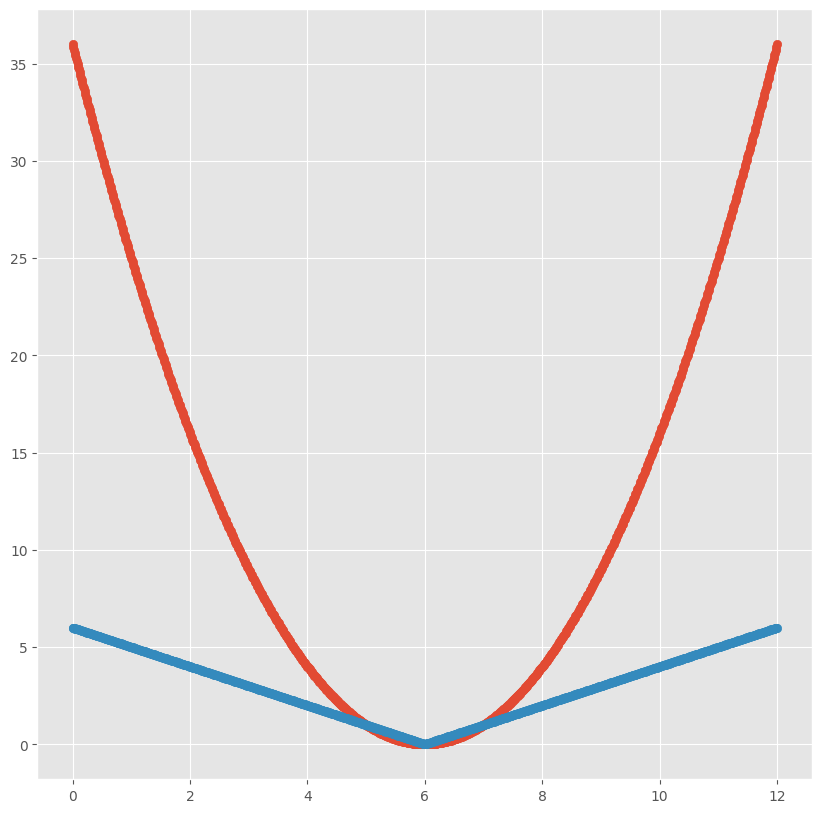

In [ ]:
## 6ft guy example
plt.style.use('ggplot')
plt.figure(figsize=(10,10))



measurements=np.linspace(0,12,1000)
plt.scatter(measurements,(measurements-6)**2)        ##mean squared error
plt.scatter(measurements,abs(measurements-6))        ## absolute error
plt.show()


In [ ]:
grades = pd.read_csv("https://archive.org/download/ml-fundamentals-data/machine-learning-fundamentals-data/grades.csv")
print(grades.shape)

subject_columns= grades.select_dtypes(include='number') ##https://stackoverflow.com/questions/25039626/how-do-i-find-numeric-columns-in-pandas

subject_columns.agg(["mean", "var", "std"])



(26, 4)


,Physics,Biology,Maths
mean,63.769231,67.038462,69.769231
var,517.224615,456.758462,300.664615
std,22.742573,21.371908,17.339683


from matplotlib import pyplot as plt
_df_0['Physics'].plot(kind='hist', bins=20, title='Physics')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Biology'].plot(kind='hist', bins=20, title='Biology')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Maths'].plot(kind='hist', bins=20, title='Maths')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('index').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Physics', y='Biology', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Biology', y='Maths', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6['Physics'].plot(kind='line', figsize=(8, 4), title='Physics')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_7['Biology'].plot(kind='line', figsize=(8, 4), title='Biology')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_8['Maths'].plot(kind='line', figsize=(8, 4), title='Maths')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_9['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_9, x='Physics', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_10['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_10, x='Biology', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_11['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_11, x='Maths', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

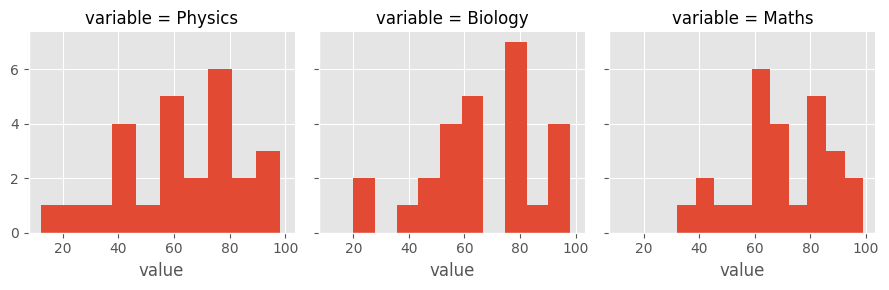

In [ ]:
g = sns.FacetGrid(grades.melt("Name"), col="variable")   ## .melt() function in pandas is used to convert wide to long format
g.map(plt.hist, "value")

In [ ]:
grades['Physics_zscore']=(grades['Physics']-grades['Physics'].mean())/(grades['Physics'].std())
##z score

grades.head(10)


,Name,Physics,Biology,Maths,Physics_zscore
0,Arnold,80,78,70,0.713673
1,Bob,60,98,45,-0.165735
2,Cassandra,34,56,65,-1.308965
3,Donovan,56,65,32,-0.341616
4,Emily,98,23,55,1.505141
5,Fabian,45,44,60,-0.825291
6,Grom,12,66,80,-2.276314
7,Hilary,60,88,78,-0.165735
8,Ivan,45,97,99,-0.825291
9,John,98,80,84,1.505141



*   zscore>0   => above average student
*   zscore<0   => below average student

magnitude of zscore signifies the no of standard deviations above/below mean


# Discussion on Concepts of Conditional Proability, Total Probability and Baye's Theorem




> Small **error** in Example of Total Probability and consequently Example 2 under Baye's theorem.
   $$\begin{align}
P(T=1)&=P(T=1|D=1)P(D=1) + P(T=1|D=0)P(D=0)\\
&= 0.95\times 0.1 + 0.10*0.90\\
&=0.185
\end{align}$$



So in example 2:


$\begin{align}
P(D=1|T=1)&=\frac{P(T=1|D=1)P(D=1)}{P(T=1)}\\
&=\frac{0.95\times 0.1}{0.185}\\
&=0.5135135135
\end{align}$


# Probability Distribution Functions


# Binomial Distribution

In [ ]:
from scipy.stats import binom

In [ ]:
binom.pmf(k=5, n=5, p=0.25)

0.0009765625

In [ ]:
1 - binom.pmf(k=4, n=5, p=0.75) - binom.pmf(k=5, n=5, p=0.75)

0.3671875

In [ ]:
binom.cdf(3, n=5, p=0.75)


0.3671875

# Normal Distribution

In [ ]:
from scipy.stats import norm

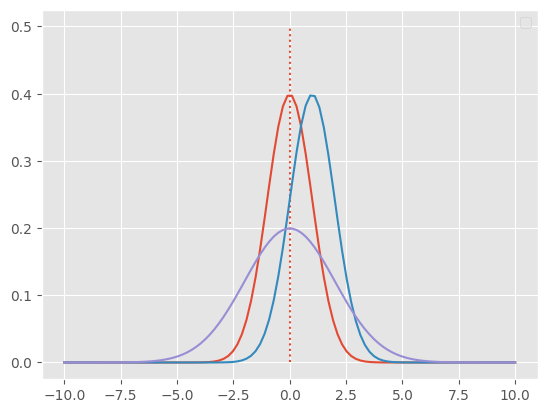

In [ ]:
x = np.linspace(-10, 10, 100)
f1 = norm.pdf(x, loc=0, scale=1)
f2 = norm.pdf(x, loc=1, scale=1)
f3 = norm.pdf(x, loc=0, scale=2)
## loc specifies mean, scale specifies SD

plt.vlines(x=0, ymin=0, ymax=0.5, linestyles="dotted")

plt.plot(x, f1)
plt.plot(x, f2)
plt.plot(x, f3)

plt.legend()
plt.show()

In [ ]:
norm.cdf(0.3)

0.6179114221889526

In [ ]:
norm.ppf(0.6179114221889526)

0.2999999999999998

In [ ]:
print(norm.ppf(0.84, loc=169.57, scale=7.57))
print(169.57 + 7.57)

print(norm.ppf(0.975, loc=169.57, scale=7.57))
print(169.57 + 2 * 7.57)

177.09804617589782
177.14
184.4069273629682
184.70999999999998


# Poisson Distribution

In [ ]:
from scipy.stats import poisson

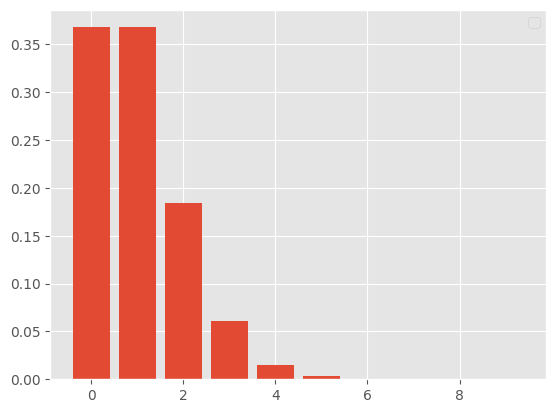

In [ ]:
x = np.arange(10)
f1 = poisson.pmf(x, mu=1)
f2 = poisson.pmf(x, mu=2)
f3 = poisson.pmf(x, mu=3)

plt.bar(x, f1)
plt.legend()


In [ ]:
x @ f1


0.999998874797402

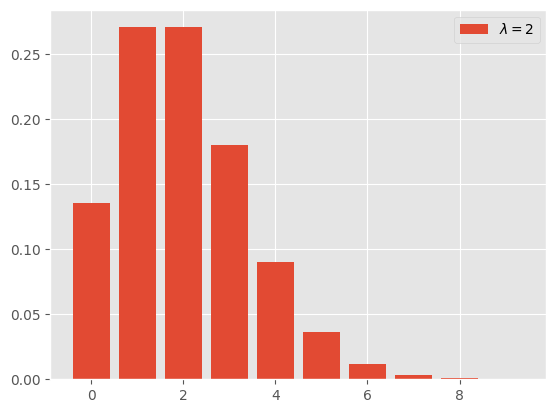

In [ ]:
plt.bar(x, f2, label="$\lambda=2$")
plt.legend()

In [ ]:
x @ f2

1.999525105343477

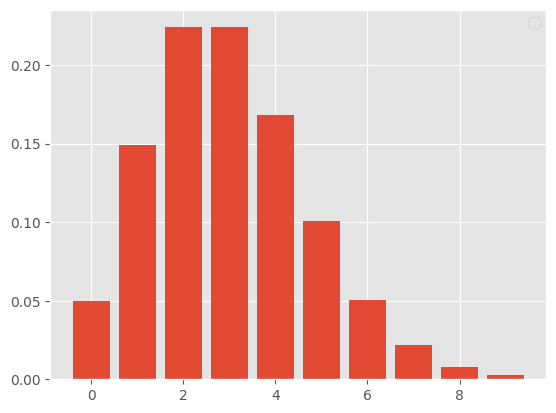

In [ ]:
plt.bar(x, f3)
plt.legend()

In [ ]:
x @ f3

2.9885910238149727

In [ ]:
poisson.pmf(3, 5)

0.1403738958142805

# Central Limit Theorem

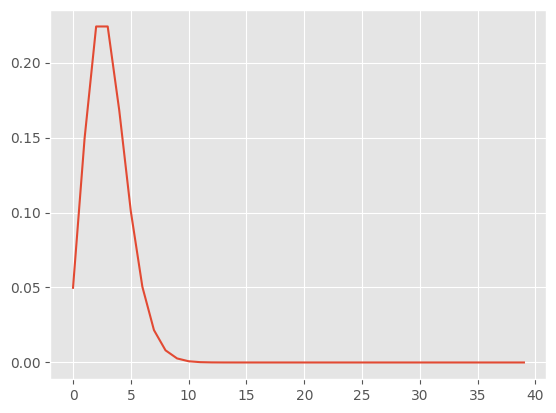

In [ ]:
bins = np.arange(0, 40)
p_pois = poisson.pmf(bins, mu=3)
plt.plot(bins, p_pois)

(array([  2.,  16.,  44.,  68., 101.,  81.,  47.,  31.,   8.,   2.]),
 array([1.9  , 2.135, 2.37 , 2.605, 2.84 , 3.075, 3.31 , 3.545, 3.78 ,
        4.015, 4.25 ]),
 <BarContainer object of 10 artists>)

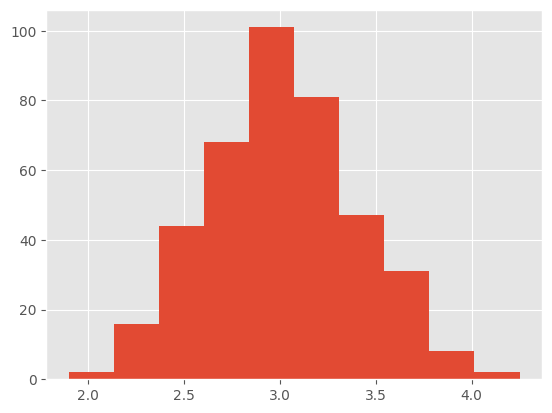

In [ ]:
def sample_pois(_):
    samples = poisson.rvs(mu=3, size=20)
    return np.mean(samples)

means = list(map(sample_pois, np.arange(400)))
plt.hist(means)

# Normal Distribution in Weight Initialisation

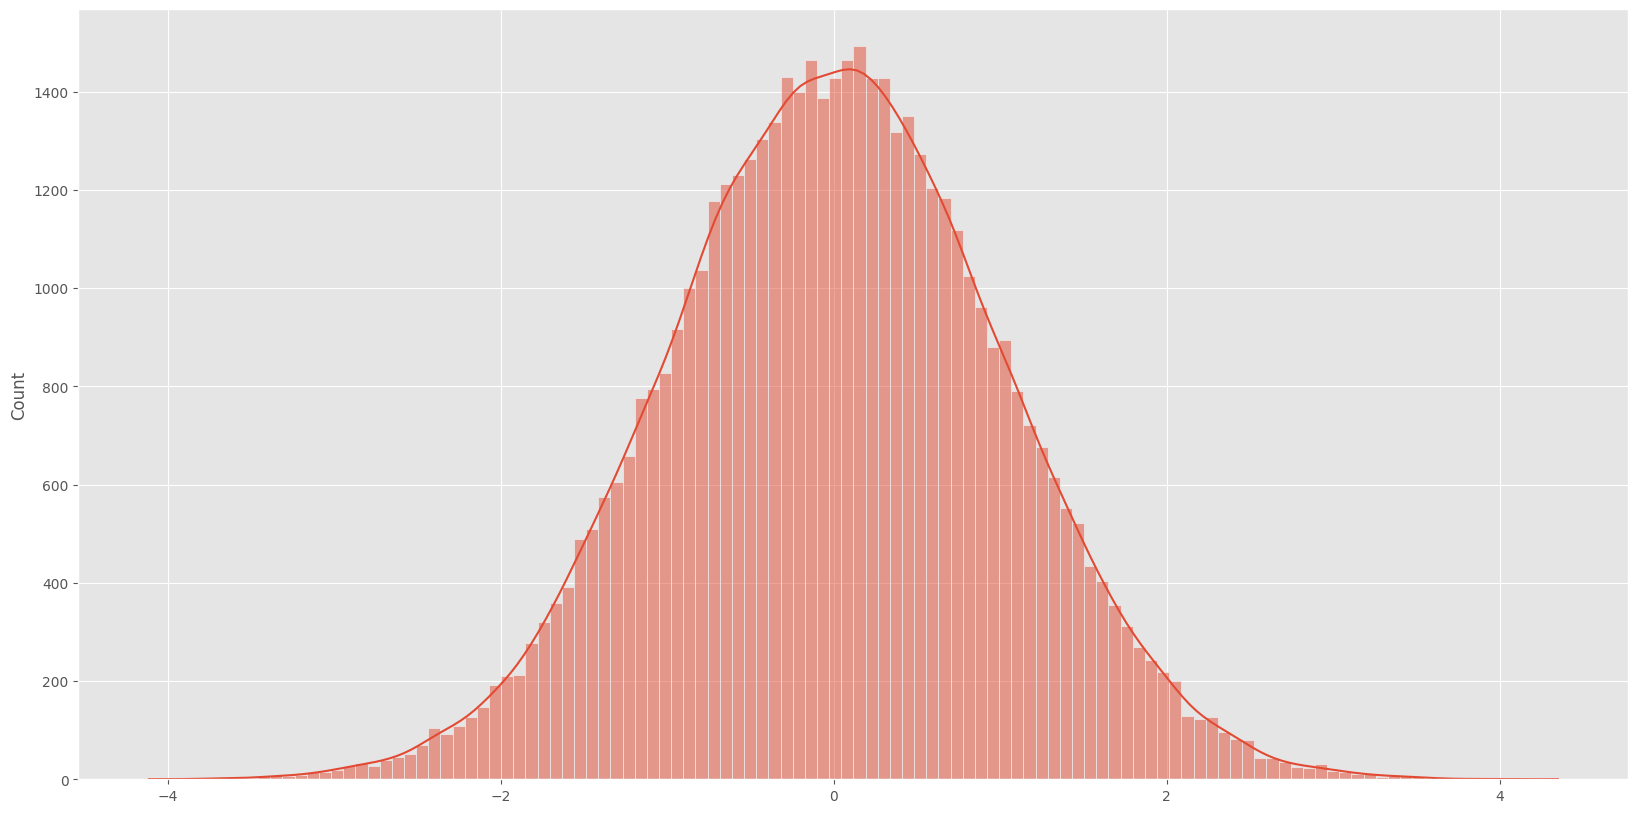

In [ ]:
import seaborn as sns
plt.figure(figsize=(20, 10))
x = np.random.normal(size=(50000))
sns.histplot(x, kde=True)
plt.show()